## Phase 4 (Modeling): Support Vector Machines

* Autorin: Anna (i3-Versicherung)
* Webseite: [Data Science Training - Kapitel 10](https://data-science.training/kapitel-10/)
* Datum: 23.03.2023

Versionen 4 und 5

In [4]:
# Pandas Paket (Package) importieren
#  Datenstrukturen und Datenanalyse, I/O
#  https://pandas.pydata.org/pandas-docs/stable/
import pandas as pd
# Klassen und Funktionen der scikit-learn Module importieren
#  Maschinelles Lernen, Algorithmen
#  https://scikit-learn.org/stable/modules/classes.html
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC
# Pickle Paket (Package) importieren
#  Objekte serialisieren
#  https://docs.python.org/3/library/pickle.html
import pickle as pk
# Eigene Module importieren
#  zur Bewertung der Modelle
import sys
sys.path.append('../00_DST_Module/')
import dst_score_functions as sf

In [5]:
# Datenversion festlegen: 4, 5
version  = 5
# Modell-Abkürzung festlegen: svm = Support Vector Machines
shortcut = 'svm'

In [6]:
# Trainingsdaten als Pandas Data Frame (df) aus Excel-Datei laden
#  (KNIME: "Excel Reader")
filename = '../../data/titanic/new/training_v' + str(version) + '.xlsx'
df_train = pd.read_excel(filename)

In [7]:
# Beschreibende Attribute extrahieren (ohne Survived)
X = df_train.iloc[:,1:].values
# Klassenattribut (Survived) extrahieren
y = df_train.iloc[:,0].values

In [8]:
# Stratifizierte k-fache Kreuzvalidierung (mit k=10)
#  (KNIME: "X-Partitioner")
skf = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)

In [9]:
# Parameterstudie
n = 0
best_parameters = None
max_acc = 0
kernel_list = ['linear', 'poly', 'sigmoid', 'rbf']
for kernel in kernel_list:
    n = n + 1
    print('.', end='')
    model = SVC(kernel=kernel, random_state=0, probability=True)
    acc = 100.0 * cross_val_score(model, X, y, cv=skf).mean()
    if acc > max_acc:
        max_acc = acc
        best_parameters = model.get_params()
        print(' %8.4f ' % acc, end='')
print()
print('Ergebnis')
print(' Anzahl Parameterkombinationen:', n)
print(' Maximale Genauigkeit:', max_acc)
print(' Parameter des besten Modells:')
print(best_parameters)

.  83.2722 ...
Ergebnis
 Anzahl Parameterkombinationen: 4
 Maximale Genauigkeit: 83.2721598002497
 Parameter des besten Modells:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [10]:
# Support Vector Machines for Classification (SVC) Methode auswählen
#  (KNIME: "XYZ Learner")
model = SVC()
model.set_params(**best_parameters)
print(model.get_params())

{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': True, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [11]:
# Ergebnisse berechnen und ausgeben
#  (KNIME: "XYZ Learner", "XYZ Predictor", "X-Aggregator", "Scorer")
scores = sf.dst_scores(model, X, y, cv=skf)
sf.dst_print_scores(scores)


Confusion Matrix

* TN (True  Negatives) : 493
* TP (True  Positives) : 248
* FN (False Negatives) : 94
* FP (False Positives) : 56

Gütemaße

* Genauigkeit  (Accuracy)    :   83,16 %
* Spezifität   (Specificity) :   89,80 %
* Sensitivität (Sensitivity) :   72,48 %
* Präzision    (Precision)   :   81,66 %
* Recall       (Recall)      :   72,48 %
* F-Maß        (F Score)     :   76,66 %
* AURC         (AURC)        :   85,44 %
* LogLoss      (LogLoss)     :    0,435

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  81,73 %


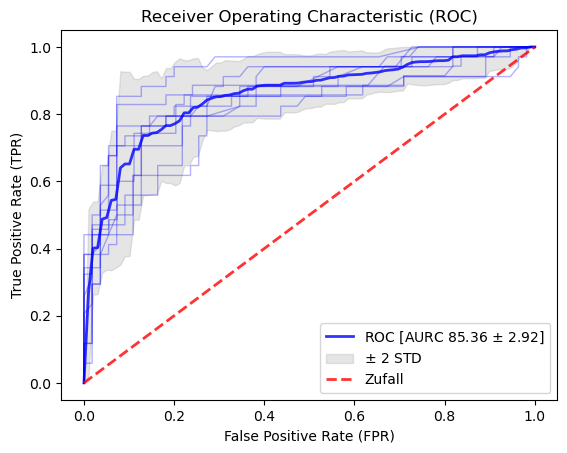

In [12]:
# Receiver Operating Characteristic (ROC) zeichnen
#  (KNIME: "ROC Curve")
sf.dst_roc(model, X, y, cv=skf)

In [13]:
# Modell mit allen Daten trainieren
#  (KNIME: "XYZ Learner")
model.fit(X, y)

SVC(kernel='linear', probability=True, random_state=0)

In [14]:
# Trainiertes Modell speichern
#  (KNIME: "PMML Writer")
filename = '../../models/titanic/new/' + shortcut + '_v' + str(version)
pk.dump(model, open(filename, 'wb'))

## Ergebnisse

#### Version 4 (Boolean bzw. Int)

Kernel = RBF

Confusion Matrix

* TN (True  Negatives) : 496
* TP (True  Positives) : 243
* FN (False Negatives) : 99
* FP (False Positives) : 53

Gütemaße

* Genauigkeit  (Accuracy)    :   82,94 %
* Spezifität   (Specificity) :   90,34 %
* Sensitivität (Sensitivity) :   71,05 %
* Präzision    (Precision)   :   82,31 %
* Recall       (Recall)      :   71,05 %
* F-Maß        (F Score)     :   76,06 %
* AURC         (AURC)        :   86,03 %
* LogLoss      (LogLoss)     :    0,434

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  81,84 %

#### Version 5 (Float)

Kernel = Linear

Confusion Matrix

* TN (True  Negatives) : 493
* TP (True  Positives) : 248
* FN (False Negatives) : 94
* FP (False Positives) : 56

Gütemaße

* Genauigkeit  (Accuracy)    :   83,16 %
* Spezifität   (Specificity) :   89,80 %
* Sensitivität (Sensitivity) :   72,48 %
* Präzision    (Precision)   :   81,66 %
* Recall       (Recall)      :   72,48 %
* F-Maß        (F Score)     :   76,66 %
* AURC         (AURC)        :   85,44 %
* LogLoss      (LogLoss)     :    0,435

Mittelwert

* Mittelwert (Accuracy, F Score, AURC, Precision):  81,73 %
